In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
import arviz as az
import pymc as pm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cellbayesassay as cba
import os.path
import re
import attila_utils

In [2]:
data = cba.get_data('../../resources/cell-based-assays/raw-data-cleaned-by-tina-CO28151-draft1.xlsx', 'Data')
data

,Study,Experiment,Assay,Batch,Plate,TI,Name,conc,concentration,conc_log10,Activity
0,CO28151,Aβ release (H4 cells),Aβ38,1,1,TI2,Phenamil methanesulfonate salt,c1,1.000000e-04,-4.0,4010.000000
1,CO28151,Aβ release (H4 cells),Aβ38,1,1,TI2,Phenamil methanesulfonate salt,c1,1.000000e-04,-4.0,6280.000000
2,CO28151,Aβ release (H4 cells),Aβ38,1,1,TI2,Phenamil methanesulfonate salt,c1,1.000000e-04,-4.0,27790.000000
3,CO28151,Aβ release (H4 cells),Aβ38,1,1,TI2,Phenamil methanesulfonate salt,c1,1.000000e-04,-4.0,32560.000000
4,CO28151,Aβ release (H4 cells),Aβ38,1,1,TI2,Phenamil methanesulfonate salt,c1,1.000000e-04,-4.0,20670.000000
...,...,...,...,...,...,...,...,...,...,...,...
1633,CO28151,Aβ clearance (BV2 cells),Aβ42 Lys,2,2,VC,,NaN,1.000000e-09,-9.0,1.010963
1634,CO28151,Aβ clearance (BV2 cells),Aβ42 Lys,2,2,VC,,NaN,1.000000e-09,-9.0,0.475578
1635,CO28151,Aβ clearance (BV2 cells),Aβ42 Lys,2,2,VC,,NaN,1.000000e-09,-9.0,1.213073
1636,CO28151,Aβ clearance (BV2 cells),Aβ42 Lys,2,2,VC,,NaN,1.000000e-09,-9.0,NaN


In [3]:
study = 'CO28151'
exper = 'Aβ clearance (BV2 cells)'
assay = 'Aβ42 Lys'
TI = 'TI13'
data_reshaped = cba.extract_regr_data(study, exper, assay, TI, data, return_data_reshaped=True)
data_reshaped

,Study,Experiment,Assay,Batch,Plate,TI,Name,conc,concentration,conc_log10,Activity,std_activity
1320,CO28151,Aβ clearance (BV2 cells),Aβ42 Lys,1,4,VC,,VC,1.000000e-09,-9.00000,0.29,0.091680
1321,CO28151,Aβ clearance (BV2 cells),Aβ42 Lys,1,4,VC,,VC,1.000000e-09,-9.00000,0.33,0.104326
1322,CO28151,Aβ clearance (BV2 cells),Aβ42 Lys,1,4,VC,,VC,1.000000e-09,-9.00000,0.24,0.075873
1323,CO28151,Aβ clearance (BV2 cells),Aβ42 Lys,1,4,VC,,VC,1.000000e-09,-9.00000,0.09,0.028453
1324,CO28151,Aβ clearance (BV2 cells),Aβ42 Lys,1,4,VC,,VC,1.000000e-09,-9.00000,0.42,0.132778
1325,CO28151,Aβ clearance (BV2 cells),Aβ42 Lys,1,4,VC,,VC,1.000000e-09,-9.00000,0.69,0.218136
1380,CO28151,Aβ clearance (BV2 cells),Aβ42 Lys,1,4,TI13,Liraglutide,c1,1.000000e-05,-5.00000,0.05,0.015807
1381,CO28151,Aβ clearance (BV2 cells),Aβ42 Lys,1,4,TI13,Liraglutide,c1,1.000000e-05,-5.00000,0.70,0.221297
1382,CO28151,Aβ clearance (BV2 cells),Aβ42 Lys,1,4,TI13,Liraglutide,c1,1.000000e-05,-5.00000,0.75,0.237104
1383,CO28151,Aβ clearance (BV2 cells),Aβ42 Lys,1,4,TI13,Liraglutide,c1,1.000000e-05,-5.00000,0.35,0.110649


In [4]:
maindir = '../../results/2024-02-14-cell-bayes/'

if not os.path.exists(maindir + 'idatas/fpaths.csv'):
    idatadf = cba.fit_multiple_units(data, unit_list=None)
    idatas = idatadf.idata
    fpathdf = cba.idatas_to_netcdf(idatas, subdir='idatas/', maindir=maindir)
    print('idatas written to netcdf')
else:
    idatas = cba.idatas_from_netcdf(subdir='idatas/', maindir=maindir)
    print('idatas read from netcdf')

idatas

idatas read from netcdf


study    experiment                assay     TI  
CO28151  Aβ clearance (BV2 cells)  Aβ42 Lys  TI1     (posterior, log_likelihood, sample_stats, obse...
                                             TI10    (posterior, log_likelihood, sample_stats, obse...
                                             TI11    (posterior, log_likelihood, sample_stats, obse...
                                             TI12    (posterior, log_likelihood, sample_stats, obse...
                                             TI13    (posterior, log_likelihood, sample_stats, obse...
                                                                           ...                        
         Aβ release (H4 cells)     Aβ42      TI5     (posterior, log_likelihood, sample_stats, obse...
                                             TI6     (posterior, log_likelihood, sample_stats, obse...
                                             TI7     (posterior, log_likelihood, sample_stats, obse...
                       

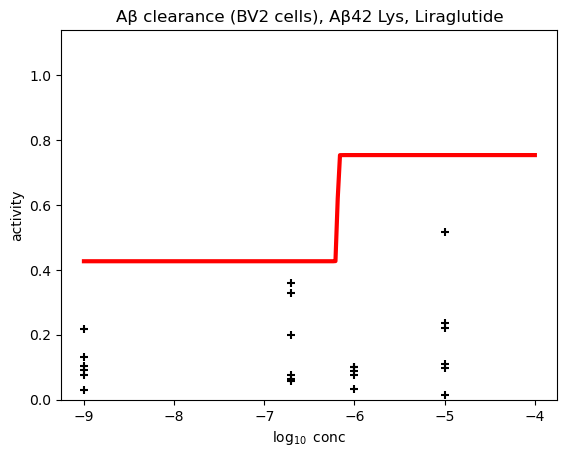

In [5]:
fig, ax = plt.subplots()
ax = cba.plot_single_unit(ax, study, exper, assay, TI, data, idatas, plot_sampled_curves=False)

In [6]:
unit_list = idatas.loc(axis=0)[:, 'Aβ clearance (BV2 cells)', 'Aβ42 Lys', :].index.to_numpy()
unit_list

array([('CO28151', 'Aβ clearance (BV2 cells)', 'Aβ42 Lys', 'TI1'),
       ('CO28151', 'Aβ clearance (BV2 cells)', 'Aβ42 Lys', 'TI10'),
       ('CO28151', 'Aβ clearance (BV2 cells)', 'Aβ42 Lys', 'TI11'),
       ('CO28151', 'Aβ clearance (BV2 cells)', 'Aβ42 Lys', 'TI12'),
       ('CO28151', 'Aβ clearance (BV2 cells)', 'Aβ42 Lys', 'TI13'),
       ('CO28151', 'Aβ clearance (BV2 cells)', 'Aβ42 Lys', 'TI14'),
       ('CO28151', 'Aβ clearance (BV2 cells)', 'Aβ42 Lys', 'TI15'),
       ('CO28151', 'Aβ clearance (BV2 cells)', 'Aβ42 Lys', 'TI2'),
       ('CO28151', 'Aβ clearance (BV2 cells)', 'Aβ42 Lys', 'TI3'),
       ('CO28151', 'Aβ clearance (BV2 cells)', 'Aβ42 Lys', 'TI4'),
       ('CO28151', 'Aβ clearance (BV2 cells)', 'Aβ42 Lys', 'TI5'),
       ('CO28151', 'Aβ clearance (BV2 cells)', 'Aβ42 Lys', 'TI6'),
       ('CO28151', 'Aβ clearance (BV2 cells)', 'Aβ42 Lys', 'TI7'),
       ('CO28151', 'Aβ clearance (BV2 cells)', 'Aβ42 Lys', 'TI8'),
       ('CO28151', 'Aβ clearance (BV2 cells)', 'Aβ42 Lys

In [7]:
cba.extract_regr_data('CO28151', 'Aβ clearance (BV2 cells)', 'Aβ42 Lys', 'TI10', data, return_data_reshaped=True)

,Study,Experiment,Assay,Batch,Plate,TI,Name,conc,concentration,conc_log10,Activity,std_activity
1104,CO28151,Aβ clearance (BV2 cells),Aβ42 Lys,1,1,VC,,VC,1.000000e-09,-9.0,1.68,30.744970
1105,CO28151,Aβ clearance (BV2 cells),Aβ42 Lys,1,1,VC,,VC,1.000000e-09,-9.0,0.50,9.150289
1106,CO28151,Aβ clearance (BV2 cells),Aβ42 Lys,1,1,VC,,VC,1.000000e-09,-9.0,0.45,8.235260
1107,CO28151,Aβ clearance (BV2 cells),Aβ42 Lys,1,1,VC,,VC,1.000000e-09,-9.0,0.92,16.836531
1108,CO28151,Aβ clearance (BV2 cells),Aβ42 Lys,1,1,VC,,VC,1.000000e-09,-9.0,0.38,6.954219
1109,CO28151,Aβ clearance (BV2 cells),Aβ42 Lys,1,1,VC,,VC,1.000000e-09,-9.0,0.17,3.111098


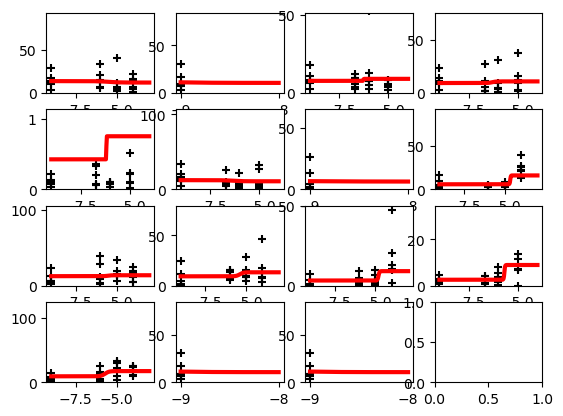

In [9]:
fig, ax = cba.plot_multiple_units(unit_list, data, idatas, plot_sampled_curves=False)

In [10]:
%connect_info

{
  "shell_port": 57883,
  "iopub_port": 57884,
  "stdin_port": 57885,
  "control_port": 57887,
  "hb_port": 57886,
  "ip": "127.0.0.1",
  "key": "fa3640e1-41980ca4269a6350a0f0856a",
  "transport": "tcp",
  "signature_scheme": "hmac-sha256",
  "kernel_name": "python3",
  "jupyter_session": "/Users/jonesa7/CTNS/notebooks/2024-02-14-cell-bayes/2024-02-14-cell-bayes.ipynb"
}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing kernel-f0d4e49c-9176-4c7b-b731-c66c114b4d7d.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.
